Assignment-3  
BITS F464    
Shivam Chadha  
2019B4AA0704G  
Honour Code: I shall be honest in my efforts and will make my parents proud

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import * 
from scipy import linalg, matrix


In [205]:
import warnings
warnings.filterwarnings("ignore")

# Section I : Vector Space

### 1.
Definitions  
1. Vector Space :  
A set where all elements satifsy the following 2 conditions 
- Addition is closed  
- Scaler multiplication is closed 

2. Column Space :  
Column space of matrix A is the span of its column vectors, i.e all possible combinations of column vectors.

3. Row space :  
Space spanned by row vectors of a matrix 

4. Right Null Space:  
For a matrix $A \in R_{mXn}$, its right  null space is a matrix $X = Null(A)$ such that AX = 0, where $X \in R_{n}x(n-r)$ , where $ r = Rank(A)$ 

5. Left Null Space:  
For a matrix $A \in R_{mXn}$, its left null space is a matrix $X = Null(A^{T})$ such that $A^{T}X = 0$, where $X \in R_{m}x(m-r)$ , where $ r = Rank(A)$ 

6.Vector Space :  
The cardinatlity of bases of vector space V, denoted by dim(V)

7. Basis of Vector Space :
A set B of vectors is called basis of vector space B, if every element of V can be represented in a finite linear combination of elements in the basis vector. This representation must also be unique. The elements of basis are linearly independent.

8. Rank of matrix A :  
The rank of matrix A is the maximum bumber of its linearly independent row/column vectors.


9. L2 norm of a vector x :  
The $l^{2}$ is the vector norm for a vector $$ x=[x_{1} x_{2}  \cdots x_{n}]^{T} $$
is
$$ |x|_{2}=\sqrt{\sum_{k=1}^{n} |x_k|^2} $$

### 2  
Answers
- Column Space
- Dot product, 0.
- 0,1
-  row,column

Statments  
• Ax = b has a solution when b lies in column space of A.  
• Two nonzero vectors are orthogonal when their dor product is 0.  
• Two nonzero vectors are orthonormal when their dot product is 0 and the L2 norm of two
vectors are 1,1 respectively.  
• Consider matrices A and B = [AA]. A and B has same row space and column space.  


### 3

1. False   
     orthogonality implies linear independence only when the 2 vectors are not zero. Otherwise they are linear independent as theor dot product is 0.
2. False  
     [1 0] , [1 1] are linearly independent but not orthogonal
3. True  
     fundamental property of matrix
4. True  
     same as 3
5. False  
     B can be some factor of A, like B=A.


### 4
$$ \left(\begin{array}{cc} 
1 & 2 & 3 & 4\\
2 & 4 & 6 & 8
\end{array}\right) $$
Transformations  
C4 = c4-4*c1  
C3 = c3-3*c1  
C2 = c2-2*c1  

$$ \left(\begin{array}{cc} 
1 & 0 & 0 & 0\\
2 & 0 & 0 & 0
\end{array}\right) $$
Rank(column) = 1  

R2 = R2-2*R1  
$$ \left(\begin{array}{cc} 
1 & 2 & 3 & 4\\
0 & 0 & 0 & 0
\end{array}\right) $$
Rank(row) = 1

Rank(matrix) = 1

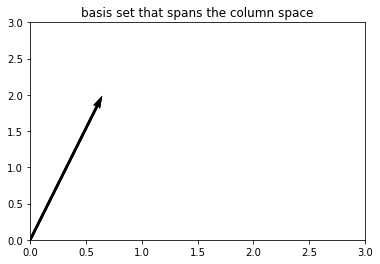

In [206]:

V = np.array([1,2])
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

plt.quiver(*origin, V[0], V[1],scale=1, scale_units='inches')
plt.xlim([0,3])
plt.ylim([0,3])
plt.title('basis set that spans the column space')
plt.show()

### 5


In [4]:
np.random.seed(42)
A = np.random.randint(0,5,size=(5,4))
A[2] = A[0]*2
A[3] = A[0]*3
A[4] = A[0]*4

b = np.random.randint(0,10,size=(5))

b[2] =  b[0]*2
b[3] =  b[0]*3
b[4] =  b[0]*4




In [5]:
print('rank:',np.linalg.matrix_rank(A))
A 

rank: 2


array([[ 3,  4,  2,  4],
       [ 4,  1,  2,  2],
       [ 6,  8,  4,  8],
       [ 9, 12,  6, 12],
       [12, 16,  8, 16]])

In [6]:
# getting row echelon form
A[2] = A[2] - A[0]*2
A[3] = A[3] - A[0]*3
A[4] = A[4] - A[0]*4

b[2] = b[2] - b[0]*2
b[3] = b[3] - b[0]*3
b[4] = b[4] - b[0]*4



fixing 2 independent variables randomly and the solving for the other 2 dependent variables

In [7]:
X = []

for i in range(100):
    x =np.random.randint(-10,10,2)
    Ax = np.dot(A[:,:2],x[:2])
    bm = b-Ax
    x2 = np.linalg.solve(A[:2,2:],bm[:2])
    x = np.append(x[:2],x2)
    X.append(x)
            
        

Checking if AX = b

In [8]:
np.dot(A,X[1])

array([9., 5., 0., 0., 0.])

### 6

In [191]:
A = np.array([[1,-1,0,1],[1,1,3,1],[1,1,2,2]])

In [192]:
np.linalg.matrix_rank(A)

3

$dim(right null space) = dim(col) - rank = 4 - 3 = 1$

$dim(left null space) = dim(row) - rank  = 3 - 3 = 0$




In [193]:
Matrix(A).nullspace()

[Matrix([
 [-5/2],
 [-3/2],
 [   1],
 [   1]])]

In [194]:
Matrix(A.T).nullspace()

[]

So left null space exists but right does not

### 7

In [202]:
b  =Matrix([[3],[1],[2]])
augA = Matrix.hstack(Matrix(A),b)
augA.rref()[0]

Matrix([
[1, 0, 0, 5/2, 7/2],
[0, 1, 0, 3/2, 1/2],
[0, 0, 1,  -1,  -1]])

Since we have an independent variable we'll always have a solution  
For no solution the rank of matrix has to be less than the rank of augmented matrix

In [203]:
print('Rank of A = ',np.linalg.matrix_rank(A))
print('Rank of A|b = ',augA.rank())

Rank of A =  3
Rank of A|b =  3


### 8

In [114]:
A = np.array([[1,2,3,4],[2,3,4,5],[5,8,11,14],[3,5,7,9]])

np.linalg.matrix_rank(A)

2

In [116]:
Matrix(A).rref()[0]

Matrix([
[1, 0, -1, -2],
[0, 1,  2,  3],
[0, 0,  0,  0],
[0, 0,  0,  0]])

now the last to rows of b must be non zero for it to not have a solution

In [117]:
x1,x2,x3,x4 = symbols('x1 x2 x3 x4')

In [118]:
b = [x1,x2,x4,x4] 

$$ A|b = \left(\begin{array}{cc} 
1 & 2 & 3 & 4 & x1\\
0 & 1 & 2 & 3 & -2x1+x2\\
0 & 0 & 0 & 0 & -x1-2x2+x3\\
0 & 0 & 0 & 0 & -x1-x2-x4\\
\end{array}\right) $$


set x1,x2=0   
Let x3 and x4 be any non zero number.  
it will give 0 = x3 and 0=-x4  
So no solution will exist

In [127]:
x1=0
x2=0
A = Matrix(A)
for i in range(1,11):
    x3 = np.random.randint(1,10)
    x4 = np.random.randint(1,10)
    augA = Matrix([[1, 2, 3, 4, x1],[2, 3, 4, 5, x2],[5, 8, 11, 14, x3],[3, 5, 7, 9, x4]])
    print("\n%d: "%i)
    print("Solution exists:  " + str(A.rank() == augA.rank()) )



1: 
Solution exists:  False

2: 
Solution exists:  False

3: 
Solution exists:  False

4: 
Solution exists:  False

5: 
Solution exists:  False

6: 
Solution exists:  False

7: 
Solution exists:  False

8: 
Solution exists:  False

9: 
Solution exists:  False

10: 
Solution exists:  False


# Section 1.2 Regression

### 9

$$
\left(\begin{array}{cc} 
1 & 0\\
0 & 1 \\
0 & 0
\end{array}\right)
\left(\begin{array}{cc} 
v_{11}\\ 
v_{12}
\end{array}\right)
=
\left(\begin{array}{cc} 
1\\ 
1\\
1
\end{array}\right)
$$ 

The matrix does not have a soln as the L.H.S cannot be equal to R.H.S regardless of values of $v_{11}$ and $v_{12} $   
This gives 3 equations:
- $v_{11} =1$
- $v_{12} = 1$
- $0=1$

The third equation is not possible,so no solutions are possible.  
Also the rank of Matrix A is 2 while the rank of b is 3. So there exists no solutions 

In [131]:
A = np.array([[1,0],[0,1],[0,0]])
b = np.ones(3)

In [132]:
np.linalg.lstsq(A,b)[0]

array([1., 1.])

In [133]:
np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),b)

array([1., 1.])

This is the least sqaures solution.

### 10

In [136]:
path = r"data_assign3.txt"
data = np.genfromtxt(path)
x = data[:,0]
y = data[:,1]

In [137]:
def poly_reg(x,y):
    a = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
    return np.dot(x,a)

In [138]:
x1 = np.c_[x,np.ones(x.shape[0])]
Y1 = poly_reg(x1,y)

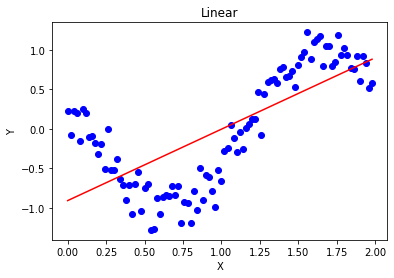

In [140]:
plt.scatter(x,y,color='b')
plt.plot(x,Y1,'r');
plt.title('Linear')
plt.ylabel('Y')
plt.xlabel('X');

In [141]:
x2 = np.c_[x,np.square(x),np.ones(x.shape[0])]
Y2 = poly_reg(x2,y)

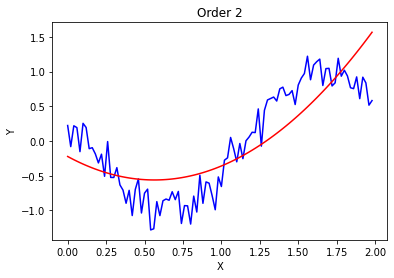

In [142]:
plt.plot(x,y,'b')
plt.plot(x,Y2,'r');
plt.title('Order 2')
plt.ylabel('Y')
plt.xlabel('X');

In [143]:
x3 = np.c_[x,np.square(x),np.power(x,3),np.ones(x.shape[0])]
Y3 = poly_reg(x3,y)

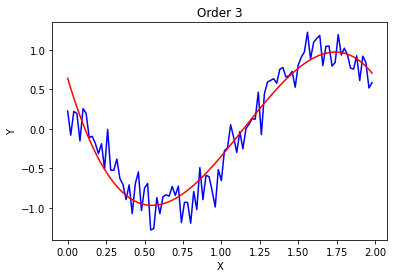

In [144]:
plt.plot(x,y,'b')
plt.plot(x,Y3,'r')
plt.title('Order 3')
plt.ylabel('Y')
plt.xlabel('X');

In [145]:
x4 = np.c_[x,np.square(x),np.power(x,3),np.power(x,4),np.ones(x.shape[0])]
Y4 = poly_reg(x4,y)

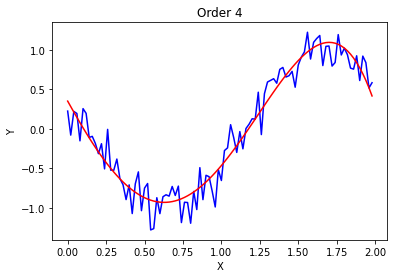

In [146]:
plt.plot(x,y,'b')
plt.plot(x,Y4,'r')
plt.title('Order 4')
plt.ylabel('Y')
plt.xlabel('X');

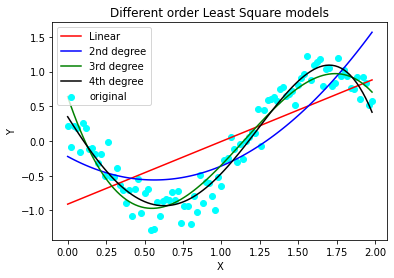

In [152]:
fig, ax = plt.subplots()


plt.scatter(x,y,color='cyan',label='original')
plt.plot(x,Y1,'r',label='Linear')
plt.plot(x,Y2,'b',label='2nd degree')
plt.plot(x,Y3,'g',label='3rd degree')
plt.plot(x,Y4,'black',label='4th degree')
plt.title('Different order Least Square models')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(loc='upper left');

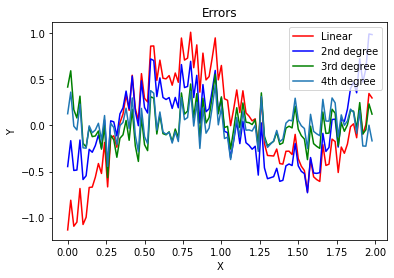

In [157]:

plt.plot(x,Y1-y,'r',label='Linear')
plt.plot(x,Y2-y,'b',label='2nd degree')
plt.plot(x,Y3-y,'g',label='3rd degree')
plt.plot(x,Y4-y,label='4th degree')
plt.title('Errors')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(loc='upper right');

In [158]:
def rmse(y,yp):
    return(np.sqrt( np.mean(np.square(y-yp))))


In [160]:
print("Root Mean squared Error")
print('Linear: ',rmse(y,Y1))
print('2nd Order: ',rmse(y,Y2))
print('3rd Order: ',rmse(y,Y3))
print('4th Order: ',rmse(y,Y4))

Root Mean squared Error
Linear:  0.5138175941321002
2nd Order:  0.4047200016044504
3rd Order:  0.20994989998219085
4th Order:  0.18081301456821453
